## Comparing the Asset Allocation Strategies

My purpose of this analysis is comparing the ASSET ALLOCATION Stratagies and making the better result with mixing it.

The historical return data set in this analysis is coming from the class of Professor Woo.   
the returns are calculated from 2008 becuase the lecturer wants to include the GFC in the data set.   
the data set has the monthly return of the stratages named 'VAAA','VAAB','DAA'.   
The cost is calculated from the lecturer, but the slippage is not calculted. It may cause the diffrent results in the actual investing conditions.

### Summary
Switching the strategy based on the previous month's BEST 'Volatility Adjusted Retuns' makes the better results than stick to only one strategy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
current_path = "C:\\Users\\Jay Park\\Documents\\GitHub\\Quant_Trading_Training\\Class_101_Quant\\"
db_path = "C:\\Users\\Jay Park\\Documents\\GitHub\\Quant_Trading_Training\\Class_101_Quant\\DB\\"

In [3]:
# Read the csv files. THe caracteristics of DATE is object. Do not use it as index at this moment.
df = pd.read_excel(db_path + "History_Return_Asset_Allocation_2022-04-18.xlsx")
df.DATE = pd.to_datetime(df.DATE)
df = df.set_index('DATE')

In [4]:
#Checking the Data set
df.head()

,RETURN_VAAA,CR_VAAA,RETURN_VAAB,CR_VAAB,RETURN_DAA,CR_DAA
DATE,,,,,,
2008-04-30,0.00,100.000000,0.00,100.000000,0.000000,100.000000
2008-05-31,3.16,103.160000,0.67,100.670000,3.210000,103.210000
2008-06-30,0.25,103.417900,-2.22,98.435126,-5.176667,97.867162
2008-07-31,0.72,104.162509,0.00,98.435126,-2.036667,95.873934
2008-08-31,1.53,105.756195,0.00,98.435126,2.328333,98.106199


In order to normalise the return, I am using the standard deviation for the past 5 years.   
After calculating the standard deviation, the monthly returns are devided by the 5 years standard deviation.

In [5]:
df.loc[:,'STD_VAAA'] = df.RETURN_VAAA.rolling(60,  min_periods=1).std().fillna(0)
df.loc[:,'STD_VAAB'] = df.RETURN_VAAB.rolling(60,  min_periods=1).std().fillna(0)
df.loc[:,'STD_DAA'] = df.RETURN_DAA.rolling(60,  min_periods=1).std().fillna(0)

df.loc[:,'RETURN_ADJ_VAAA'] = (df.RETURN_VAAA / df.STD_VAAA).fillna(0)
df.loc[:,'RETURN_ADJ_VAAB'] = (df.RETURN_VAAB / df.STD_VAAB).fillna(0)
df.loc[:,'RETURN_ADJ_DAA'] = (df.RETURN_DAA / df.STD_DAA).fillna(0)

In [6]:
df.tail()

,RETURN_VAAA,CR_VAAA,RETURN_VAAB,CR_VAAB,RETURN_DAA,CR_DAA,STD_VAAA,STD_VAAB,STD_DAA,RETURN_ADJ_VAAA,RETURN_ADJ_VAAB,RETURN_ADJ_DAA
DATE,,,,,,,,,,,,
2021-09-30,-4.66,359.416291,-3.5625,208.387393,-3.598333,453.383320,2.685009,1.796973,2.792283,-1.735562,-1.982500,-1.288671
2021-10-31,-0.34,358.194275,0.0000,208.387393,-0.340000,451.841817,2.680324,1.799101,2.781973,-0.126850,0.000000,-0.122215
2021-11-30,-0.12,357.764442,-2.2740,203.648664,-3.208333,437.345225,2.677600,1.838492,2.819575,-0.044816,-1.236883,-1.137879
2021-12-31,-0.52,355.904067,0.0000,203.648664,1.291667,442.994268,2.681922,1.838492,2.816763,-0.193891,0.000000,0.458564
2022-01-31,-3.46,343.589786,-1.2235,201.157023,-3.378333,428.028445,2.739558,1.853147,2.872441,-1.262978,-0.660228,-1.176119


Now the volatility adjusted returns are calculated. My idea is that to getting the position according to the best volatility adjusted return from previous month. Using the idxmax, we can put the column names in the new column named 'BEST_RETURN'.   

In [7]:
df['BEST_RETURN'] = df[['RETURN_ADJ_VAAA','RETURN_ADJ_VAAB','RETURN_ADJ_DAA']].idxmin(axis=1)

In [8]:
df.BEST_RETURN.head(10)

DATE
2008-04-30    RETURN_ADJ_VAAA
2008-05-31    RETURN_ADJ_VAAA
2008-06-30    RETURN_ADJ_VAAB
2008-07-31     RETURN_ADJ_DAA
2008-08-31    RETURN_ADJ_VAAB
2008-09-30     RETURN_ADJ_DAA
2008-10-31    RETURN_ADJ_VAAB
2008-11-30    RETURN_ADJ_VAAB
2008-12-31    RETURN_ADJ_VAAB
2009-01-31     RETURN_ADJ_DAA
Name: BEST_RETURN, dtype: object

In order to calculate the 'next month performance' from the 'best performance' in this month, I create the new column which is shifted from the 'BEST_RETURN'. I prefer to put the VAAA strategy as default, the return of the VAAA is going to be used for empty cell.

In [9]:
df['BEST_RETURN_S'] = df.BEST_RETURN.shift().fillna('RETURN_ADJ_VAAA')

df['CAL1'] = df.loc[:,"RETURN_VAAA"][df.BEST_RETURN_S == "RETURN_ADJ_VAAA"].fillna(0)
df['CAL2'] = df[df.BEST_RETURN_S == "RETURN_ADJ_VAAB"].RETURN_VAAB.fillna(0)
df['CAL3'] = df[df.BEST_RETURN_S == "RETURN_ADJ_DAA"].RETURN_DAA.fillna(0)

df.CAL1 = df.CAL1.fillna(0)
df.CAL2 = df.CAL2.fillna(0)
df.CAL3 = df.CAL3.fillna(0)

df['TO_CAL'] = df.CAL1 + df.CAL2 + df.CAL3
df.loc[:,'STD_TO_CAL'] = df.TO_CAL.rolling(60,  min_periods=1).std().fillna(0)

df.TO_CAL.tail()

DATE
2021-09-30   -4.66
2021-10-31    0.00
2021-11-30   -0.12
2021-12-31    0.00
2022-01-31   -3.46
Name: TO_CAL, dtype: float64

The column TO_CAL is the series of the monthly return that having the return from the best previous month volatility adjusted return.   
To compare the history, we make a cumulated return.

In [10]:
df['CR_CAL'] = ((df.TO_CAL/100)+1).cumprod()
df.CR_CAL = df.CR_CAL*100
df.head()

,RETURN_VAAA,CR_VAAA,RETURN_VAAB,CR_VAAB,RETURN_DAA,CR_DAA,STD_VAAA,STD_VAAB,STD_DAA,RETURN_ADJ_VAAA,RETURN_ADJ_VAAB,RETURN_ADJ_DAA,BEST_RETURN,BEST_RETURN_S,CAL1,CAL2,CAL3,TO_CAL,STD_TO_CAL,CR_CAL
DATE,,,,,,,,,,,,,,,,,,,,
2008-04-30,0.00,100.000000,0.00,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,RETURN_ADJ_VAAA,RETURN_ADJ_VAAA,0.00,0.0,0.000000,0.000000,0.000000,100.000000
2008-05-31,3.16,103.160000,0.67,100.670000,3.210000,103.210000,2.234457,0.473762,2.269813,1.414214,1.414214,1.414214,RETURN_ADJ_VAAA,RETURN_ADJ_VAAA,3.16,0.0,0.000000,3.160000,2.234457,103.160000
2008-06-30,0.25,103.417900,-2.22,98.435126,-5.176667,97.867162,1.756711,1.512691,4.231591,0.142311,-1.467584,-1.223338,RETURN_ADJ_VAAB,RETURN_ADJ_VAAA,0.25,0.0,0.000000,0.250000,1.756711,103.417900
2008-07-31,0.72,104.162509,0.00,98.435126,-2.036667,95.873934,1.449399,1.261834,3.523413,0.496758,0.000000,-0.578038,RETURN_ADJ_DAA,RETURN_ADJ_VAAB,0.00,0.0,0.000000,0.000000,1.542841,103.417900
2008-08-31,1.53,105.756195,0.00,98.435126,2.328333,98.106199,1.274782,1.106436,3.395217,1.200205,0.000000,0.685769,RETURN_ADJ_VAAB,RETURN_ADJ_DAA,0.00,0.0,2.328333,2.328333,1.490264,105.825813


Now we have too many columns, it is not efficient to having all the columns. I select the cumulated return columns.

In [11]:
df_compare = df.loc[:,['CR_VAAA','CR_VAAB','CR_DAA','CR_CAL']]
df_compare.tail()

,CR_VAAA,CR_VAAB,CR_DAA,CR_CAL
DATE,,,,
2021-09-30,359.416291,208.387393,453.383320,370.344523
2021-10-31,358.194275,208.387393,451.841817,370.344523
2021-11-30,357.764442,203.648664,437.345225,369.900109
2021-12-31,355.904067,203.648664,442.994268,369.900109
2022-01-31,343.589786,201.157023,428.028445,357.101566


Now proceeding the steps for calculating MDD.

In [12]:
df_compare['MAX_VAAA'] = df_compare.CR_VAAA.rolling(150, min_periods=1).max()
df_compare['MAX_VAAB'] = df_compare.CR_VAAB.rolling(150, min_periods=1).max()
df_compare['MAX_DAA'] = df_compare.CR_DAA.rolling(150, min_periods=1).max()
df_compare['MAX_CAL'] = df_compare.CR_CAL.rolling(150, min_periods=1).max()

df_compare['DD_VAAA'] = (df_compare.CR_VAAA - df_compare.MAX_VAAA)/df_compare.MAX_VAAA *100
df_compare['DD_VAAB'] = (df_compare.CR_VAAB - df_compare.MAX_VAAB)/df_compare.MAX_VAAB *100
df_compare['DD_DAA'] = (df_compare.CR_DAA - df_compare.MAX_DAA)/df_compare.MAX_DAA * 100
df_compare['DD_CAL'] = (df_compare.CR_CAL - df_compare.MAX_CAL)/df_compare.MAX_CAL *100


### The Results

In [13]:
print("Comparing the CAGRs")
number_months = len(df_compare)/12
print("CAGR of VAAA : ",(((df_compare.CR_VAAA[-1]/100)**(1/number_months))-1)*100, " %")
print("CAGR of VAAB : ",(((df_compare.CR_VAAB[-1]/100)**(1/number_months))-1)*100, " %")
print("CAGR of DAA : ",(((df_compare.CR_DAA[-1]/100)**(1/number_months))-1)*100, " %")
print("CAGR of CAL : ",(((df_compare.CR_CAL[-1]/100)**(1/number_months))-1)*100, " %")

print("")
print("Comparing the MDDs")
print("MDD of VAAA : ", df_compare.DD_VAAA.min(), " %" )
print("MDD of VAAB : ", df_compare.DD_VAAB.min(), " %" )
print("MDD of DAA : ", df_compare.DD_DAA.min(), " %" )
print("MDD of CAL : ", df_compare.DD_CAL.min(), " %" )

print("")
print("Comparing the volatility")
print("Standard Deviation of VAAA : ", df.RETURN_VAAA.std())
print("Standard Deviation of VAAB : ", df.RETURN_VAAB.std())
print("Standard Deviation of DAA : ", df.RETURN_DAA.std())
print("Standard Deviation of CAL : ", df.TO_CAL.std())

Comparing the CAGRs
CAGR of VAAA :  9.332655688981205  %
CAGR of VAAB :  5.1822128937470735  %
CAGR of DAA :  11.083261858698833  %
CAGR of CAL :  9.637935649025732  %

Comparing the MDDs
MDD of VAAA :  -12.368460886153958  %
MDD of VAAB :  -6.908570345143759  %
MDD of DAA :  -17.620258333333336  %
MDD of CAL :  -8.561672250000003  %

Comparing the volatility
Standard Deviation of VAAA :  2.9428924761743285
Standard Deviation of VAAB :  1.6348939993556906
Standard Deviation of DAA :  3.2819274869029127
Standard Deviation of CAL :  2.7671457822435785


It looks the mixed strategy has better results. The CAGR is more than VAAA but the lower MDD & volatility.

In [14]:
to_draw = df_compare.loc[:,['CR_VAAA','CR_VAAB','CR_DAA','CR_CAL']]

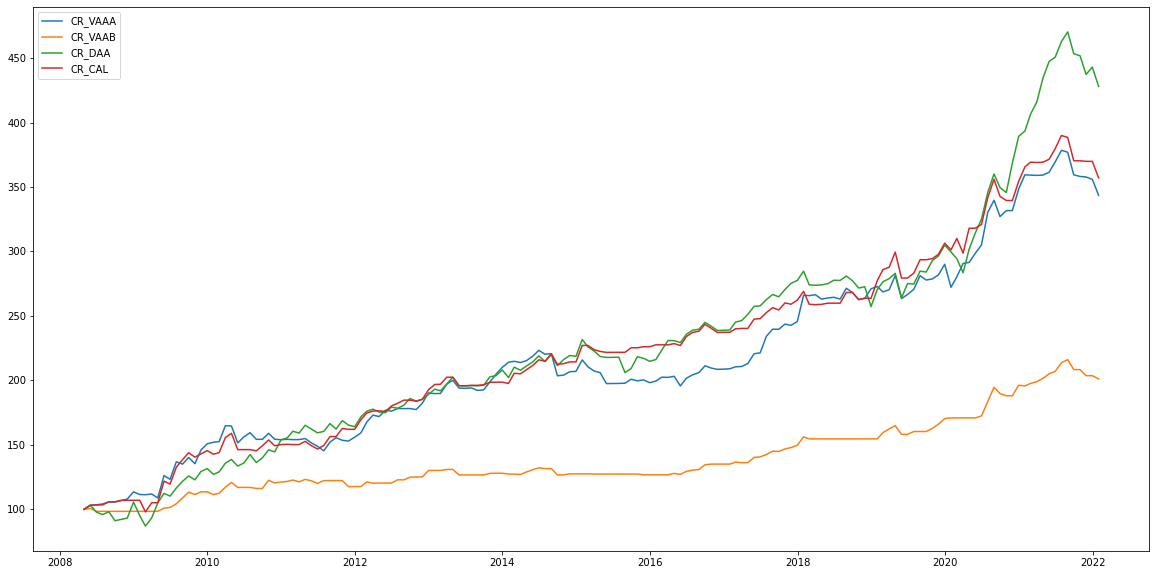

In [15]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(to_draw)
ax1.legend(to_draw)
plt.show()